<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/deeplearning/blob/master/notebooks/3.2_deepleaningintroduction_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/deeplearning/blob/master/notebooks/3.2_deepleaningintroduction_dnn.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

# Ejemplo de código
# Guía 2: Proyecto Precio de vehículos usados
## Machine Learning II

#### Profesor: Sergio David Díaz Veru
#### Participantes:
- SERGIO HERRERA QUIJANO
- JUAN DAVID ORTEGA MURCIA
- OSCAR IVAN BAUTISTA SANTANA
___

<h1 id="problema">Contexto analítico y exploración de datos</h1>

El mercado de autos usados es reconocido por ser un sector economico muy competido con un centenar de compañias que luchan por hacerse con una porción de la torta. El precio de los autos se devalua año año debido a multiples factores y determinar el precio correcto es clave para las compañias para lograr competir en el mercado. En este caso se requiere implementar una red neural que permita determinar el valor más justo para los vehiculos dependiento de sus atributos.

Se cuenta con un dataset used-car-price-prediction-dataset cargado directamente desde kaggle


In [840]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [841]:
cars = pd.read_excel(r'BASES\used_cars.xlsx')

In [842]:
cars.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598


# 1. Evalua la cantidad, tipo y completitud de las variables disponibles

En esta sección, se realiza una exploración básica del conjunto de datos "cars" utilizando algunas funciones de pandas.

Primero, se utiliza la función shape de pandas para imprimir la cantidad de filas y columnas en "cars". Esto proporciona una idea inicial de la magnitud del conjunto de datos.

Luego, se utiliza la función isnull para detectar la cantidad de valores nulos en cada columna de "cars". Se calcula el porcentaje de valores nulos para cada columna y se imprime en pantalla.

In [843]:
print(cars.shape)
print(100 * cars.isnull().sum() / cars.shape[0])

(4009, 12)
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64


A continuación, se utiliza la función DataFrame de pandas para crear un nuevo dataframe llamado "types", que almacena los tipos de datos de cada columna en "cars". Esto ayuda a comprender mejor la estructura de los datos y cómo se deben manejar

In [844]:
types = pd.DataFrame(cars.dtypes)
print(types.groupby(0).size())

0
int64     3
object    9
dtype: int64


Finalmente, se crea una lista llamada "categoricas" que almacena los nombres de las columnas que contienen datos categóricos (es decir, no numéricos). Se utiliza un bucle para recorrer cada columna categórica y se imprime en pantalla la cantidad de valores únicos en esa columna. Esto proporciona información adicional sobre la naturaleza de los datos y cómo se deben procesar para el análisis posterior.

In [845]:
categoricas = [col for col in types.index[types[0] == 'O'].values if col != 'price']
for line in categoricas:
    print("La variable " + line + " contiene:", str(len(cars[line].unique())) + " valores distintos")

La variable brand contiene: 57 valores distintos
La variable model contiene: 1898 valores distintos
La variable fuel_type contiene: 8 valores distintos
La variable engine contiene: 1146 valores distintos
La variable transmission contiene: 62 valores distintos
La variable ext_col contiene: 319 valores distintos
La variable int_col contiene: 156 valores distintos
La variable accident contiene: 3 valores distintos
La variable clean_title contiene: 2 valores distintos


# Ingeniería de datos

Ahora se debe preparar la información para poder alimentar la red neuronal.

# 2. Implementa estrategías para tratar la información nula en las variables cuya tasa de nulos sea máximo el 10%

En esta sección, se realizan algunas tareas de limpieza y preparación de datos para el conjunto de datos "cars".

1. En primer lugar, se rellenan los valores faltantes en la columna "fuel" con el valor más común utilizando la función fillna de pandas. Este es un ejemplo de cómo manejar valores nulos o faltantes en el conjunto de datos.
2. Luego, se vuelven a imprimir las dimensiones de "cars" y se verifica si hay valores nulos en otras columnas.
3. Después, se rellenan los valores faltantes en las columnas "title_status", "transmission" y "manufacturer" con el valor más común utilizando la función fillna de pandas.

In [846]:
cars['fuel_type'].fillna(cars['fuel_type'].mode()[0], inplace=True)
cars['clean_title'].fillna(cars['clean_title'].mode()[0], inplace=True)
cars['accident'].fillna(cars['accident'].mode()[0], inplace=True)

In [847]:
100*cars.isnull().sum()/cars.shape[0]

brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
price           0.0
dtype: float64

In [848]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


Luego del procedimiento anterior se debe proceder a convertir las variables categoricas en variables numericas. Durante el curso implementamos un método de One Hot Encoding disponible en Scikit Learn. En este caso utilizaremos una funcionalidad embedida en Pandas denominada ["get_dummies"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html):

* A continuación, se crea una copia del dataframe llamado "df" y se aplican técnicas de codificación de variables categóricas. Se crea una nueva columna para cada valor posible en cada variable categórica y se codifica como 1 si la observación tiene ese valor y 0 si no lo tiene. Esto se realiza utilizando la función get_dummies de pandas.
* Además, se eliminan las columnas que contienen la categoría "other" ya que no aportan ningún valor al conjunto de datos.
* Luego, se vuelven a imprimir las dimensiones de "df" y se imprime una vista previa del conjunto de datos.

In [849]:
df = cars.drop(columns='brand')
types = pd.DataFrame(df.dtypes)
categoricas = [col for col in types.index[types[0] == 'O'].values if col != 'price']
for col in categoricas:
    df = pd.concat([df, pd.get_dummies(df[col], dtype=int)], axis=1)
    df.drop(columns=[col], inplace=True)
    
if 'other' in df.columns:
    df.drop('other', axis=1, inplace=True)
    

A continuación, se utiliza la función DataFrame de pandas para crear un nuevo dataframe llamado "types", que almacena los tipos de datos de cada columna en "df".

In [850]:
types = pd.DataFrame(df.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
int32    3591
int64       3
dtype: int64


Después, se seleccionan las columnas numéricas del conjunto de datos y se eliminan las que corresponden a la variable objetivo ("price"). Esto se realiza utilizando la función set de Python para encontrar las columnas numéricas y luego la función list para convertir el resultado en una lista.

Por último, se crea un nuevo dataframe llamado "variables_consolidadas" que contiene solo las variables numéricas y se crea un nuevo dataframe llamado "objetivo" que contiene solo la variable objetivo ("price").

In [851]:
columnas_numericas = list(set(df.select_dtypes(include=['number']).columns) - {'price'})
variables_consolidadas = df[columnas_numericas]

objetivo = df[['price']]


In [852]:
for col in df.select_dtypes(include=['int32', 'int64']).columns:
    df[col] = df[col].astype('int32') 

In [853]:
df

,model_year,milage,price,124 Spider Abarth,128 i,135 i,135 is,1500 Big Horn,1500 Cheyenne,1500 Cheyenne Extended Cab,...,WHITE,Walnut,Whisper Beige,White,White / Brown,Yellow,â€“,At least 1 accident or damage reported,None reported,Yes
0,2013,51000,10300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2021,34742,38005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2022,22372,54598,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2015,88900,15500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2021,9835,34999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2023,714,349950,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4005,2022,10900,53900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4006,2022,2116,90998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4007,2020,33000,62999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# 3. Separa el set de datos consolidados en 3 sets (entrenamiento, prueba y validación) de acuerdo con las recomendaciones vistas en el curso.


En estas líneas de código se utiliza la librería Scikit-learn para dividir los datos en conjuntos de entrenamiento, validación y prueba. Se utiliza la función "train_test_split" para crear los tres conjuntos a partir de las variables consolidadas (x) y la variable objetivo (y).
* Primero, se divide en 80% de entrenamiento y 20% de prueba.
* Luego, se divide el conjunto de entrenamiento en 90% para entrenamiento y 10% para validación.

In [854]:
x = df.drop(columns=['price'])
y = df['price']


In [855]:
types = pd.DataFrame(x.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
int32    3593
dtype: int64


In [856]:
x_train_i, x_test, y_train_i, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_i, y_train_i, test_size=0.1, random_state=42)

Posteriormente, se utiliza la función "reshape" para cambiar la forma de las variables objetivo y poder utilizarlas en modelos de aprendizaje automático. 

In [857]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

Finalmente, se imprimen las formas (shapes) de los conjuntos de entrenamiento, validación y prueba para verificar que se hayan creado correctamente.

In [858]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (2886, 3593)
Shape of x_test: (802, 3593)
Shape of x_val: (321, 3593)
Shape of y_train: (2886, 1)
Shape of y_test: (802, 1)
Shape of y_val: (321, 1)


<h1 id="arquitectura">Diseño, Entrenamiento y Evaluación de la RN</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Realiza la prueba con un par de arquitecturas iniciales.
* Evalua el desempeño de la red.
* Si el desempeño es bajo vuelve a la información y prueba estrategias de estandarización de la información.

# 4. Implementa una red neuronal cuyas pérdidas (MSE) con el set de prueba sea menor a 0.40.

Se importa la clase StandardScaler de la biblioteca sklearn.preprocessing, la cual es una técnica de preprocesamiento de datos que escala los datos para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque ayuda a que el modelo pueda trabajar con variables en la misma escala, lo que puede mejorar su rendimiento.

Se crea una instancia de StandardScaler() y se llama al método fit() con los datos de entrenamiento x_train, para que el objeto pueda aprender los parámetros de escalamiento a partir de estos datos.

In [859]:
scaler_x = StandardScaler()



x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
x_val.columns = x_val.columns.astype(str)


x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
x_val_scaled = scaler_x.transform(x_val)

In [860]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)
y_val_scaled = scaler_y.transform(y_val)

Luego, se crea una instancia de la clase Sequential y se añaden varias capas Dense con activación relu, una capa Dropout y una capa final con activación linear

In [861]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Se compila el modelo con el optimizador adam, la función de pérdida mse (mean squared error) y la métrica mean_absolute_error.

In [862]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

Se imprime un resumen del modelo con la función summary().

In [863]:
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_136 (Dense)               │ (None, 256)            │       920,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961,281 (3.67 MB)

 Trainable params: 961,281 (3.67 MB)

 Non-trainable params: 0 (0.00 B)

Se entrena el modelo llamando al método fit() con los datos escalados y se guardan los resultados del entrenamiento en el objeto modelhistory. El modelo se entrena durante 50 épocas con un tamaño de lote de 1024. También se proporcionan los datos de validación para que se evalúe el rendimiento del modelo en cada época.

In [864]:
modelhistory = model.fit(
    x_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=10,
    validation_data=(x_val_scaled, y_val_scaled),
    verbose=1
)

Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.5376 - mae: 0.5376 - val_loss: 0.3664 - val_mae: 0.3659
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.4275 - mae: 0.4275 - val_loss: 0.2745 - val_mae: 0.2758
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2965 - mae: 0.2965 - val_loss: 0.2755 - val_mae: 0.2803
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2792 - mae: 0.2792 - val_loss: 0.2951 - val_mae: 0.3004
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2146 - mae: 0.2146 - val_loss: 0.2598 - val_mae: 0.2667
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1902 - mae: 0.1902 - val_loss: 0.2393 - val_mae: 0.2453
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1897 - mae: 0.1897 - val_loss: 0.2205 - val_mae: 0.2233
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1687 - mae: 0.1687 - val_loss: 0.2336 - val_mae: 0.2389
Epoch 9/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 

Ahora realiza la evaluación del modelo con el set de entrenamiento.

In [865]:
result = model.evaluate(x_test_scaled, y_test_scaled)
for i in range(len(model.metrics_names)):
    print("Métrica ", model.metrics_names[i], ":", str(round(result[i], 2)))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4841 - mae: 0.4850 
Métrica  loss : 0.39
Métrica  compile_metrics : 0.4


Si el modelo cumple con el requerimiento, se guarda con el siguiente comando:

In [866]:
result

[0.3862467110157013, 0.3982143700122833]

In [867]:
if result[0] < 0.4:
    model.save('predictedprices.h5')

# 5. Realiza un gráfico que evidencia la evolución de la función de pérdidas a traves de las distintas épocas de entrenamiento.

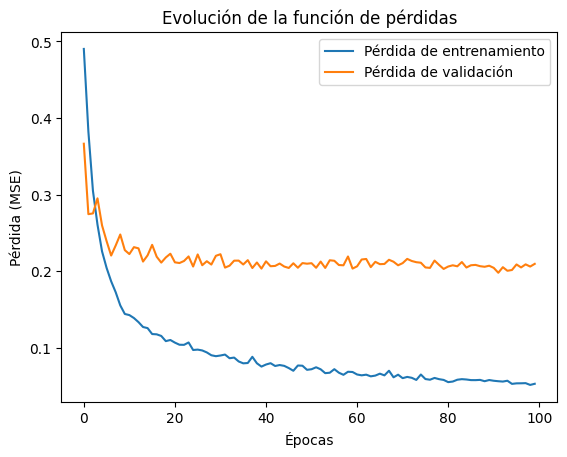

In [868]:

import matplotlib.pyplot as plt

plt.plot(modelhistory.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelhistory.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Evolución de la función de pérdidas')
plt.legend()
plt.show()

Trata de realizar predicciones con el modelo

In [869]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
real = pd.DataFrame(y_test)

predic = model.predict(pd.DataFrame(x_train_scaled))

if predic.ndim == 1:
    predic = predic.reshape(-1, 1)

valores_reescalados = scaler_y.inverse_transform(predic)
pred_escal = pd.DataFrame(valores_reescalados)

for i in range(5):
    print("Real=%s, Predicción=%s" % (real.iloc[i, 0], pred_escal.iloc[i, 0]))


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Real=28000, Predicción=39190.74
Real=5900, Predicción=22331.904
Real=41000, Predicción=24595.684
Real=40250, Predicción=11317.293
Real=77999, Predicción=91327.98


___
¡Todo bien! ¡Es todo por hoy! 😀